In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("titanic.csv")

In [95]:
df.select_dtypes(include=['object']).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [96]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0]
print(missing_values)

Age         177
Cabin       687
Embarked      2
dtype: int64


In [97]:
women = df.loc[df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("# of women who survived:", rate_women)

# of women who survived: 0.7420382165605095


In [98]:
men = df.loc[df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("# of men who survived:", rate_men)

# of men who survived: 0.18890814558058924


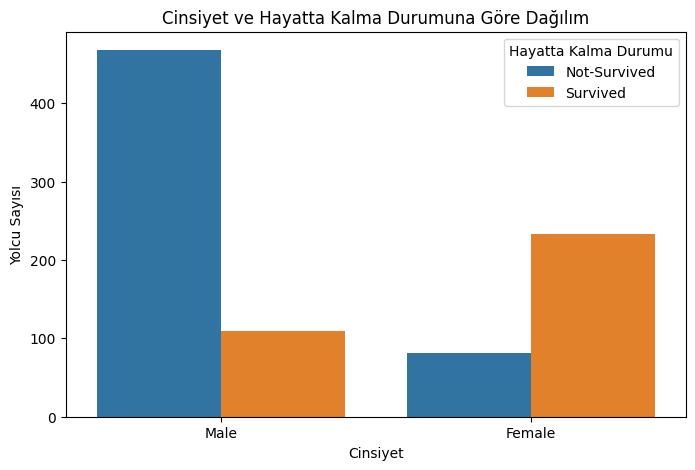

In [99]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Distribution by Gender and Survival Status')
plt.xlabel('Sex')
plt.ylabel('Number of Passengers')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.legend(title='Survival Status', labels=['Not-Survived', 'Survived'])
plt.show()

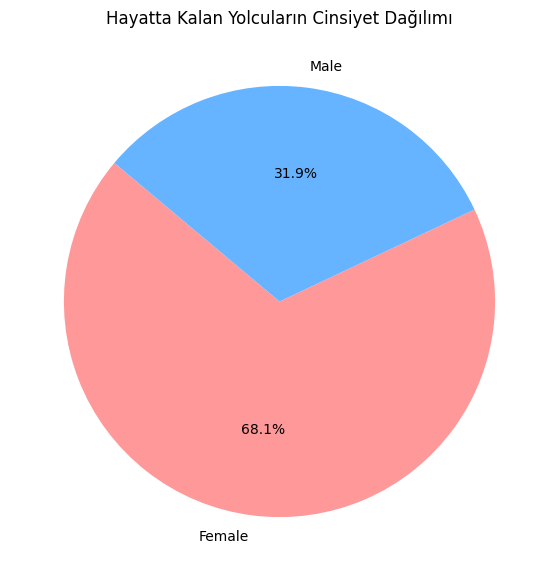

In [100]:
survived_passengers = df[df['Survived'] == 1]
gender_counts = survived_passengers['Sex'].value_counts()
plt.figure(figsize=(7, 7))
colors = ['#ff9999','#66b3ff']  
labels = ['Female', 'Male']  
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Gender Distribution of Surviving Passengers')
plt.show()

/var/folders/gw/67gm5hlx0gscp4nvgpv5lns80000gn/T/ipykernel_54785/2567084486.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, palette='viridis')


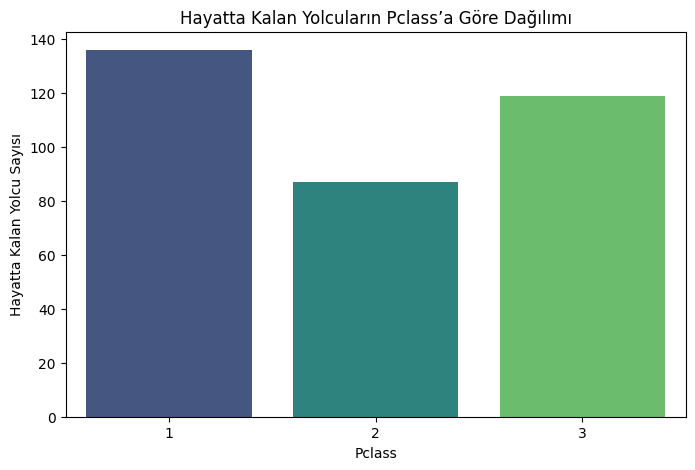

In [101]:
survival_by_pclass = df[df['Survived'] == 1].groupby('Pclass').size()

plt.figure(figsize=(8, 5))
sns.barplot(x=survival_by_pclass.index, y=survival_by_pclass.values, palette='viridis')
plt.title('Distribution of Surviving Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Number of Surviving Passengers')
plt.show()

/var/folders/gw/67gm5hlx0gscp4nvgpv5lns80000gn/T/ipykernel_54785/671098102.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_alone.index, y=survival_by_alone.values, palette='viridis')


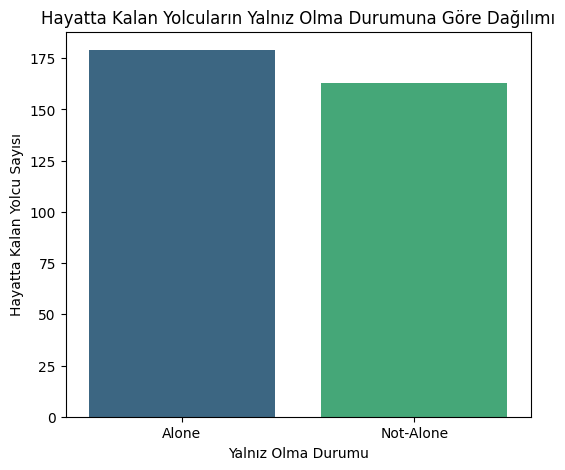

In [102]:
df['isAlone'] = (df['SibSp'] == 0) & (df['Parch'] == 0)
survived_passengers = df[df['Survived'] == 1]

survival_by_alone = survived_passengers['isAlone'].value_counts()

plt.figure(figsize=(6, 5))
sns.barplot(x=survival_by_alone.index, y=survival_by_alone.values, palette='viridis')
plt.title('Distribution of Surviving Passengers by Loneliness Status')
plt.xlabel('The State of Being Alone')
plt.ylabel('Number of Surviving Passengers')
plt.xticks(ticks=[0, 1], labels=['Alone', 'Not-Alone'])
plt.show()

In [103]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

/var/folders/gw/67gm5hlx0gscp4nvgpv5lns80000gn/T/ipykernel_54785/1245384040.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


In [104]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [105]:
most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)

/var/folders/gw/67gm5hlx0gscp4nvgpv5lns80000gn/T/ipykernel_54785/296112776.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_frequent_embarked, inplace=True)


In [106]:
df['Embarked'] = df['Embarked'].apply(lambda x: 1 if x == 'C' else (2 if x == 'Q' else 0))
#df_dummies = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
#convert to numerical with dummy 

In [107]:
drop_cols = ['PassengerId', 'Name','Ticket','Cabin'
             ]

In [108]:
X = df.drop(columns=drop_cols)

In [109]:
correlation_matrix = X.corr()

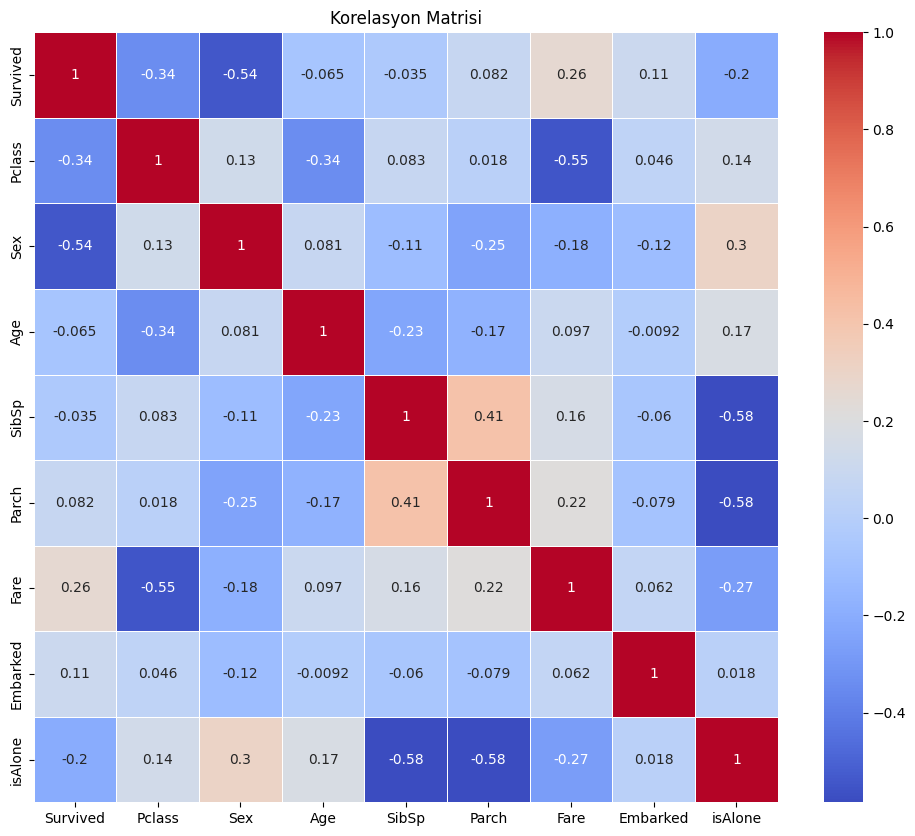

In [110]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

In [111]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
y = train_df["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [115]:
features = ["Pclass", "Sex", "SibSp", "Parch"]
model_names = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), SVC(), DecisionTreeClassifier()]

In [116]:
def train_and_evaluate_models(features, model_names):

    X = pd.get_dummies(df[features], drop_first= True)
    y = df['Survived']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    selected_models = {model.__class__.__name__: model for model in model_names}

    results = {}
    for model_name, model in selected_models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        conf_matrix = confusion_matrix(y_test, y_pred)
        results[model_name] = {
            "Accuracy": accuracy,
            "Classification Report": report,
            "Confusion Matrix": conf_matrix
        }

    return results


In [117]:
model_results = train_and_evaluate_models(features, model_names)

with open("results.txt", "w") as f:
    for model_name, metrics in model_results.items():
        f.write(f"Model: {model_name}\n")
        f.write(f"Accuracy: {metrics['Accuracy']:.4f}\n")
        f.write("Classification Report:\n")
        class_report_df = pd.DataFrame(metrics['Classification Report']).transpose()
        f.write(class_report_df.to_string())
        f.write("\n")
        f.write("Confusion Matrix:\n")
        conf_matrix_df = pd.DataFrame(metrics['Confusion Matrix'])
        f.write(conf_matrix_df.to_string())
        f.write("\n\n")